<a href="https://colab.research.google.com/github/Nikhileswar-Komati/Suicide_Ideation/blob/master/XGB_Deployment_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "nikhileswarkomati"
os.environ['KAGGLE_KEY'] = "001b3a30170775e55950edb6ff0c9b17"
!kaggle datasets download -d nikhileswarkomati/suicide-watch

 95% 249M/261M [00:03<00:00, 85.8MB/s]
100% 261M/261M [00:03<00:00, 83.5MB/s]


In [3]:
!unzip '/content/suicide-watch.zip'

Archive:  /content/suicide-watch.zip
  inflating: Cleaned_Depression_Vs_Suicide.csv  


In [3]:
data = pd.read_csv('/content/Cleaned_Depression_Vs_Suicide.csv', lineterminator = '\n')
data.sample(5)

,text,class
218100,Lying to Therapist or Psychiatrist about suici...,depression
251748,This Is Me (Bit long)Hi everyone. I wanted to ...,depression
165809,I briefly found happiness. Then everything fel...,depression
607073,I have become one with the WearinessForgive me...,depression
136869,"Chambered.Some days I feel like dying, some I ...",SuicideWatch


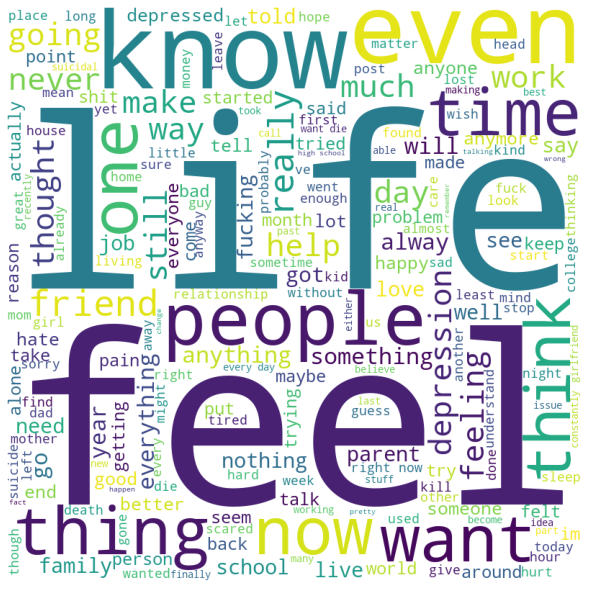

In [5]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads 'Youtube04-Eminem.csv' file 

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in data.iloc[:5000, 0]: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [5]:
data.shape

(609772, 2)

In [6]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

le = LabelEncoder()

y = le.fit_transform(y)

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.9)
print(train_X.shape, test_y.shape)

(548794,) (60978,)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

clf = Pipeline([('cv', CountVectorizer()), ('xgb', XGBClassifier())])

clf.fit(train_X, train_y)
print("------------Training Done ----------")
predictions = clf.predict(test_X)


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
test_acc_sklearn = np.sum(predictions == test_y) / float(len(test_y)) 


print ("Test Set Examples: ", len(test_y)) 
print ("Test Set Accuracy: ", test_acc_sklearn * 100, "%")

In [ ]:
from joblib import dump

# dump the pipeline model
dump(clf, filename = "suicide.joblib")

['suicide.joblib']

In [ ]:
from joblib import load

# sample tweet text
text = ["fuck this shit"]

# load the saved pipleine model
pipeline = load("/content/suicide.joblib")

# predict on the sample tweet text
pipeline.predict(text)

array([0])

In [ ]:
le.inverse_transform(pipeline.predict(text))

array(['SuicideWatch'], dtype=object)

In [ ]:
import tweepy
import time
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

# api key
api_key = "YfsfRUtv0Jstlvm0TLg8DrZNA"
# api secret key
api_secret_key = "Dx95SabGPVACrlQanwkajOnsfss0tWsyej8xO8rUKnf6N70Tyh"
# access token
access_token = "704330902432669696-pmTtYoAM3ywia3zAY5sWAEVkzhWUwan"
# access token secret
access_token_secret = "BSW1LmSmDZmNrDPL3KytWXgZeOTHo99Ee1vDu1FBc5EAJ"

# authorize the API Key
authentication = tweepy.OAuthHandler(api_key, api_secret_key)

# authorization to user's access token and access token secret
authentication.set_access_token(access_token, access_token_secret)

# call the api
api = tweepy.API(authentication, wait_on_rate_limit=True)

In [ ]:
def get_related_tweets(text_query):
    # list to store tweets
    tweets_list = []
    # no of tweets
    count = 50
    try:
        # Pulling individual tweets from query
        for tweet in api.search(q=text_query, count=count, lang = 'en'):
            print(tweet.text)
            # Adding to list that contains all tweets
            tweets_list.append({'created_at': tweet.created_at,
                                'tweet_id': tweet.id,
                                'tweet_text': tweet.text})
        return pd.DataFrame.from_dict(tweets_list)

    except BaseException as e:
        print('failed on_status,', str(e))
        time.sleep(3)

In [ ]:
get_related_tweets('suicide')

RT @DeepikaBhardwaj: Sunanda Pushkar Death Case- No Conclusive Cause Of Death  After 4 Years, Even Suicide Not Established: Sr. Adv. Vikas…
RT @srivatsayb: Actor SSR Died by Suicide
☑️ CBI/IT/ED/NCB case
☑️ 24*7 Media Coverage for Months
☑️ Whatsapp Chats leaked

2 MPs Died by S…
RT @KinelRyan: With the charity auction items included, the @GeeksGamersCom community helped raise nearly $100,000 dollars for suicide prev…
RT @ndtv: Wrestler Ritika Phogat, Geeta Phogat's Cousin, Dies. Cops Suspect Suicide https://t.co/peqjhDHTXS https://t.co/1cRfG9pqi1
RT @ZackSnyder: Tonight I’m joining Uche Nwaneri @chukwu77 to raise suicide prevention awareness through @afspnational. As we celebrate the…
Tw // suicide shooting

Im not saying this can be fake, but this is ??? I dont know,, a bit?? Weird, she shot herse… https://t.co/rl1fn9ohxX
RT @vaastavngo: No one is safe from #GenderBiasedLaws

Time to stop male hatred &amp; bring #GenderNeutralLaw
#JudgesAccountabilityBill
#Police…
// suicide
-
-
-
-


,created_at,tweet_id,tweet_text
0,2021-03-18 06:50:12,1372440182075523072,"RT @DeepikaBhardwaj: Sunanda Pushkar Death Case- No Conclusive Cause Of Death After 4 Years, Even Suicide Not Established: Sr. Adv. Vikas…"
1,2021-03-18 06:50:12,1372440182042071041,RT @srivatsayb: Actor SSR Died by Suicide\n☑️ CBI/IT/ED/NCB case\n☑️ 24*7 Media Coverage for Months\n☑️ Whatsapp Chats leaked\n\n2 MPs Died by S…
2,2021-03-18 06:50:07,1372440161590607880,"RT @KinelRyan: With the charity auction items included, the @GeeksGamersCom community helped raise nearly $100,000 dollars for suicide prev…"
3,2021-03-18 06:50:07,1372440158096658432,"RT @ndtv: Wrestler Ritika Phogat, Geeta Phogat's Cousin, Dies. Cops Suspect Suicide https://t.co/peqjhDHTXS https://t.co/1cRfG9pqi1"
4,2021-03-18 06:50:06,1372440155613708289,RT @ZackSnyder: Tonight I’m joining Uche Nwaneri @chukwu77 to raise suicide prevention awareness through @afspnational. As we celebrate the…
5,2021-03-18 06:50:05,1372440151008243712,"Tw // suicide shooting\n\nIm not saying this can be fake, but this is ??? I dont know,, a bit?? Weird, she shot herse… https://t.co/rl1fn9ohxX"
6,2021-03-18 06:50:05,1372440149720625152,RT @vaastavngo: No one is safe from #GenderBiasedLaws\n\nTime to stop male hatred &amp; bring #GenderNeutralLaw\n#JudgesAccountabilityBill\n#Police…
7,2021-03-18 06:50:04,1372440148894433282,// suicide\n-\n-\n-\n-\nYeah quite a few timez but now I wouldn’t because I’d miss all my mutualz so thanks for keeping… https://t.co/v0jycM8fIH
8,2021-03-18 06:50:04,1372440145647992832,"RT @jkd18: #RitikaPhogat was 17! She lost a match by one point, allegedly. And she got so disheartened, she committed suicide... I'm sure y…"
9,2021-03-18 06:50:03,1372440142670036993,RT @srivatsayb: Actor SSR Died by Suicide\n☑️ CBI/IT/ED/NCB case\n☑️ 24*7 Media Coverage for Months\n☑️ Whatsapp Chats leaked\n\n2 MPs Died by S…


In [ ]:
!python --version

Python 3.7.10


In [ ]:
!pip install xgboost

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'